In [ ]:
!pip install wfdb wget

     |████████████████████████████████| 122kB 5.8MB/s 
     |████████████████████████████████| 6.8MB 13.0MB/s 
     |████████████████████████████████| 163kB 77.8MB/s 
  Created wheel for wfdb: filename=wfdb-3.1.1-cp36-none-any.whl size=117829 sha256=e95c3e77e8640f0b20791a8c81c58bee38399a2de9d5ba02f640c6da760bc1c4
  Stored in directory: /root/.cache/pip/wheels/bc/d0/c1/90538d266ccba2d1076fbc9970192c7ea1a09c99df3e65c69b
  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9681 sha256=2462ca2ed84eaddf9f1f12f9b18ff4fc71e237e68aabfa91bccf5c9dc4778c82
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wfdb wget


In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import os
import shutil

shutil.copy("/content/drive/My Drive/kaggle.json","./kaggle.json")

'./kaggle.json'

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [ ]:
!kaggle datasets download -d bjoernjostein/georgia-12lead-ecg-challenge-database

100% 481M/483M [00:29<00:00, 16.7MB/s]
100% 483M/483M [00:29<00:00, 17.1MB/s]


In [ ]:
!kaggle datasets download -d bjoernjostein/st-petersburg-incart-12lead-arrhythmia-database

 99% 561M/564M [00:32<00:00, 12.5MB/s]
100% 564M/564M [00:32<00:00, 18.2MB/s]


In [ ]:
!kaggle datasets download -d bjoernjostein/ptbxl-electrocardiography-database

 99% 1.34G/1.35G [01:16<00:00, 27.0MB/s]
100% 1.35G/1.35G [01:17<00:00, 18.9MB/s]


In [ ]:
!kaggle datasets download -d bjoernjostein/ptb-diagnostic-ecg-database

 99% 881M/890M [00:27<00:00, 24.9MB/s]
100% 890M/890M [00:27<00:00, 34.3MB/s]


In [ ]:
!kaggle datasets download -d bjoernjostein/china-12lead-ecg-challenge-database

 98% 399M/406M [00:24<00:00, 21.6MB/s]
100% 406M/406M [00:26<00:00, 16.0MB/s]


In [ ]:
!kaggle datasets download -d bjoernjostein/china-physiological-signal-challenge-in-2018

 99% 817M/824M [00:46<00:00, 21.4MB/s]
100% 824M/824M [00:46<00:00, 18.4MB/s]


In [ ]:
!kaggle datasets download -d bjoernjostein/physionet-snomed-mappings

  0% 0.00/3.37k [00:00<?, ?B/s]
100% 3.37k/3.37k [00:00<00:00, 3.16MB/s]


In [ ]:
import os, zipfile

dir_name = "./"
extension = ".zip"

os.chdir(dir_name) # change directory from working dir to dir with files

for item in os.listdir(dir_name): # loop through items in dir
    if item.endswith(extension): # check for ".zip" extension
        file_name = os.path.abspath(item) # get full path of files
        zip_ref = zipfile.ZipFile(file_name) # create zipfile object
        zip_ref.extractall(dir_name) # extract file to dir
        zip_ref.close() # close file
        os.remove(file_name) # delete zipped file

In [ ]:
import shutil
import os

source = 'Training_2/'
dest1 = 'WFDB/'

files = os.listdir(source)

for f in files:
    shutil.move(source+f, dest1)

In [ ]:
source = 'Training_PTB/'
dest1 = 'WFDB/'

files = os.listdir(source)

for f in files:
    shutil.move(source+f, dest1)

In [ ]:
source = 'Training_StPetersburg/'
dest1 = 'WFDB/'

files = os.listdir(source)

for f in files:
    shutil.move(source+f, dest1)

In [ ]:
source = 'Training_WFDB/'
dest1 = 'WFDB/'

files = os.listdir(source)

for f in files:
    shutil.move(source+f, dest1)

In [ ]:
#@title Loading some packages and defining a function to load data
import os
import numpy as np, sys,os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
import wfdb
import tarfile
import wget
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import StratifiedKFold
from keras.preprocessing.sequence import pad_sequences
import math
import warnings



def load_challenge_data(filename):
    x = loadmat(filename)
    data = np.asarray(x['val'], dtype=np.float64)
    new_file = filename.replace('.mat','.hea')
    input_header_file = os.path.join(new_file)
    with open(input_header_file,'r') as f:
        header_data=f.readlines()
    return data, header_data


def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [ ]:
SNOMED_scored=pd.read_csv("SNOMED_mappings_scored.csv", sep=";")
SNOMED_unscored=pd.read_csv("SNOMED_mappings_unscored.csv", sep=";")
def move_unscored_ecgs():
  os.mkdir("./unusedECG")
  eval_array = np.asarray(SNOMED_scored.iloc[0:,1])
  for i in sorted(os.listdir("./WFDB/")):
    if i.endswith(".mat"):
        data, header_data = load_challenge_data("./WFDB/"+i)
        diagnose = header_data[15][5:-1]
        diagnose = diagnose.split(",")
        diagnose = np.asarray(diagnose)
        if pd.Series(eval_array).isin(diagnose).any():
          pass
        else:
          shutil.move("./WFDB/"+i,"./unusedECG") 
#move_unscored_ecgs()

In [ ]:
#@title Import all diagnosis to Notebook
def import_key_data():
  gender=[]
  age=[]
  labels=[]
  ecg_filenames=[]
  for ecgfilename in sorted(os.listdir("./WFDB/")):
      if ecgfilename.endswith(".mat"):
          print(ecgfilename)
          data, header_data = load_challenge_data("./WFDB/"+ecgfilename)
          labels.append(header_data[15][5:-1])
          ecg_filenames.append("./WFDB/"+ecgfilename)
          gender.append(header_data[14][6:-1])
          age.append(header_data[13][6:-1])
  return gender, age, labels, ecg_filenames

gender_temp, age_temp, labels_temp, ecg_filenames_temp = import_key_data()

Streaming output truncated to the last 5000 lines.
HR20881.mat
HR20882.mat
HR20883.mat
HR20884.mat
HR20885.mat
HR20886.mat
HR20887.mat
HR20888.mat
HR20889.mat
HR20890.mat
HR20891.mat
HR20892.mat
HR20893.mat
HR20894.mat
HR20895.mat
HR20896.mat
HR20897.mat
HR20898.mat
HR20899.mat
HR20900.mat
HR20901.mat
HR20902.mat
HR20903.mat
HR20904.mat
HR20905.mat
HR20906.mat
HR20907.mat
HR20908.mat
HR20909.mat
HR20910.mat
HR20911.mat
HR20912.mat
HR20913.mat
HR20914.mat
HR20915.mat
HR20916.mat
HR20917.mat
HR20918.mat
HR20919.mat
HR20920.mat
HR20921.mat
HR20922.mat
HR20923.mat
HR20924.mat
HR20925.mat
HR20926.mat
HR20927.mat
HR20928.mat
HR20929.mat
HR20930.mat
HR20931.mat
HR20932.mat
HR20933.mat
HR20934.mat
HR20935.mat
HR20936.mat
HR20937.mat
HR20938.mat
HR20939.mat
HR20940.mat
HR20941.mat
HR20942.mat
HR20943.mat
HR20944.mat
HR20945.mat
HR20946.mat
HR20947.mat
HR20948.mat
HR20949.mat
HR20950.mat
HR20951.mat
HR20952.mat
HR20953.mat
HR20954.mat
HR20955.mat
HR20956.mat
HR20957.mat
HR20958.mat
HR20959.mat
H

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


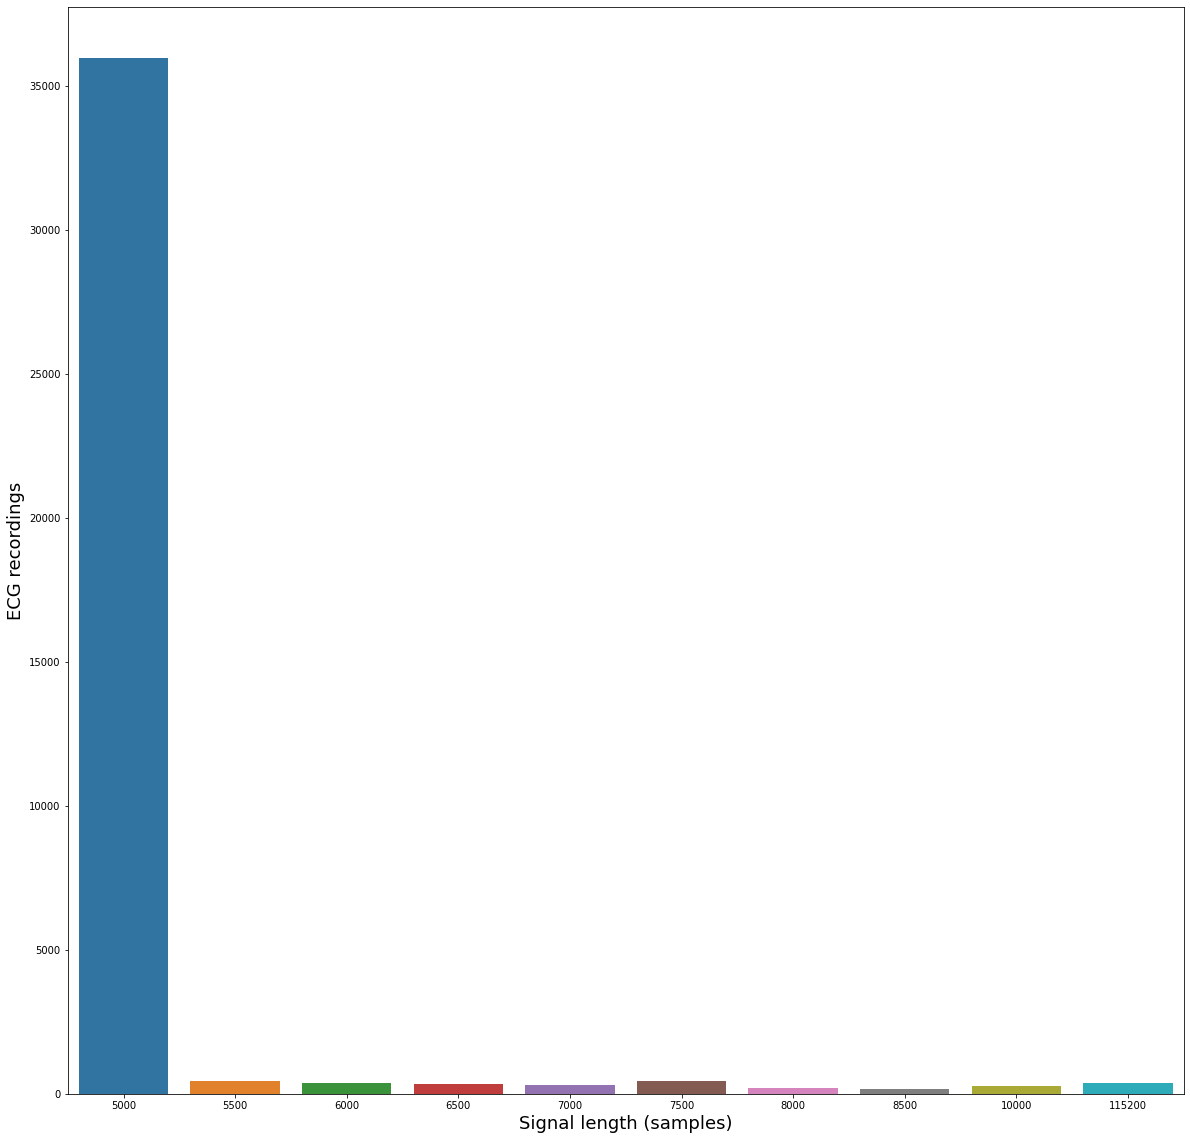

In [ ]:
def get_signal_length():
  signal_lenght=[]
  for ecgfilename in sorted(os.listdir("./WFDB/")):
      if ecgfilename.endswith(".mat"):
          data, header_data = load_challenge_data("./WFDB/"+ecgfilename)
          splitted = header_data[0].split()
          signal_lenght.append(int(splitted[3]))
  signal_lenght_df = pd.DataFrame(signal_lenght)
  signal_count=signal_lenght_df[0].value_counts()
  plt.figure(figsize=(20,20))
  sns.barplot(signal_count[:10,].index, signal_count[:10,].values)
  #sns.distplot(signal_lenght_df[0])
  #sns.barplot(signal_lenght_df[0])
  #sns.barplot(signal_count[:12,].index, signal_count[:12,].values)
  plt.ylabel("ECG recordings", fontsize=18)
  plt.xlabel("Signal length (samples)", fontsize=18)
  #plt.savefig("signallengde.png",dpi = 500)
  return signal_lenght_df
  
signal_lenght = get_signal_length()

In [ ]:
def clean_gender_data(gender):
  gender = np.asarray(gender)
  gender[np.where(gender == "Male")] = 0
  gender[np.where(gender == "male")] = 0
  gender[np.where(gender == "M")] = 0
  gender[np.where(gender == "Female")] = 1
  gender[np.where(gender == "female")] = 1
  gender[np.where(gender == "F")] = 1
  gender[np.where(gender == "NaN")] = 2
  np.unique(gender)
  gender = gender.astype(np.int)
  return gender
gender_temp_binary = clean_gender_data(gender_temp)
gender_temp_binary.shape

(43101,)

In [ ]:
def clean_age_data(age):
  age = np.asarray(age)
  age[np.where(age == "NaN")] = -1
  np.unique(age)
  age = age.astype(np.int)
  return age
age_temp_clean = clean_age_data(age_temp)
age_temp_clean.shape

(43101,)

In [ ]:
SNOMED_scored.iloc[21,1]

426783006

In [ ]:
test_labels = pd.DataFrame(labels_temp)

In [ ]:
test_labels.replace(to_replace=str(SNOMED_scored.iloc[21,1]), inplace=True ,value="Normal", regex=True)

In [ ]:
test_labels[test_labels != "Normal"] = "Unormal"        

In [ ]:
test_labels

,0
0,Unormal
1,Normal
2,Unormal
3,Unormal
4,Unormal
...,...
43096,Unormal
43097,Unormal
43098,Unormal
43099,Unormal


In [ ]:
one_hot = MultiLabelBinarizer()
y_ohe=one_hot.fit_transform(test_labels[0].str.split(pat=','))
print(one_hot.classes_)
print("classes: {}".format(y_ohe.shape[1]))

['Normal' 'Unormal']
classes: 2


In [ ]:
y_ohe.shape

(43101, 2)

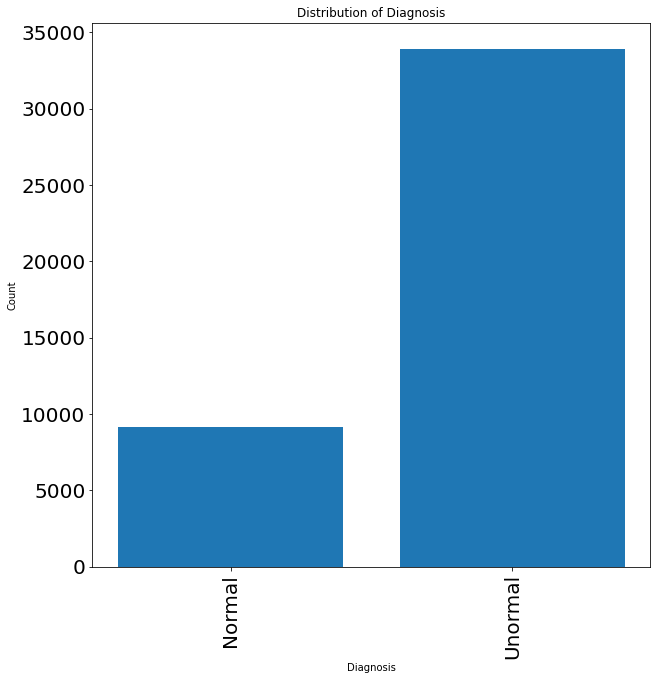

In [ ]:
def plot_classes(classes):
  for j in range(len(classes)):
    for i in range(len(SNOMED_scored.iloc[:,1])):
      if (str(SNOMED_scored.iloc[:,1][i]) == classes[j]):
        classes[j] = SNOMED_scored.iloc[:,0][i]
  plt.figure(figsize=(10,10))
  plt.bar(x=classes,height=y_ohe.sum(axis=0))
  plt.title("Distribution of Diagnosis", color = "black")
  plt.tick_params(axis="both", colors = "black")
  plt.xlabel("Diagnosis", color = "black")
  plt.ylabel("Count", color = "black")
  plt.xticks(rotation=90, fontsize=20)
  plt.yticks(fontsize = 20)
  plt.savefig("fordeling.png")
  plt.show()

plot_classes(one_hot.classes_)

In [ ]:
#@title Transform our One Hot encoded multilabel output to a new type of label where all can be represented by a number:
from sklearn.preprocessing import LabelEncoder

def get_new_labels(y):
    y_new = LabelEncoder().fit_transform([''.join(str(l)) for l in y])
    return y_new

y_ohe_new = get_new_labels(y_ohe)
print("Total number of unique combinations of diagnosis: {}".format(len(np.unique(y_ohe_new))))

Total number of unique combinations of diagnosis: 2


In [ ]:
#@title K-fold, 10 splits, Shuffle=True and random_state = 42. The distribution of Training and Val data in each fold is now:
from sklearn.model_selection import StratifiedKFold
folds = list(StratifiedKFold(n_splits=10, shuffle=True, random_state=42).split(test_labels,y_ohe_new))
print("Training split: {}".format(len(folds[0][0])))
print("Validation split: {}".format(len(folds[0][1])))

Training split: 38790
Validation split: 4311


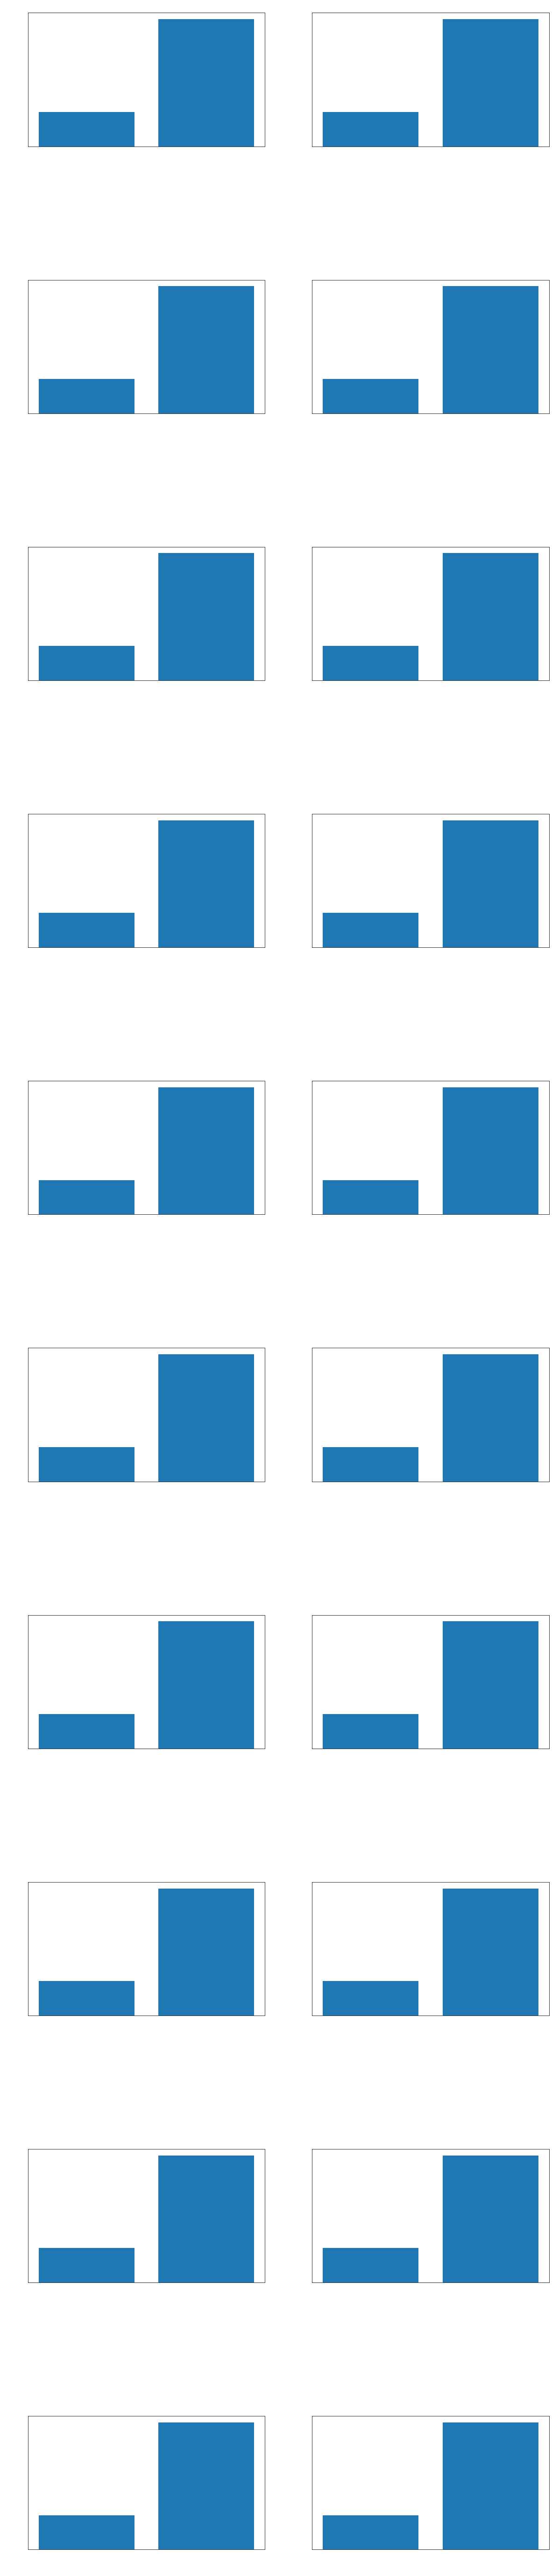

In [ ]:
#@title The distribution of diagnosis in each Fold:
X_axis_labels=one_hot.classes_
plt.figure(figsize=(20,100))
h=1
for i in range(len(folds)):
  plt.subplot(10,2,h)
  plt.subplots_adjust(hspace=1.0)
  plt.bar(x= X_axis_labels, height=y_ohe[folds[i][0]].sum(axis=0))
  plt.title("Distribution of Diagnosis - Training set - Fold {}".format(i+1) ,fontsize="20", color = "white")
  plt.tick_params(axis="both", colors = "white")
  plt.xticks(rotation=90, fontsize=10)
  plt.yticks(fontsize = 10)
  #plt.xlabel("Diagnosis", color = "white")
  plt.ylabel("Count", color = "white")
  h=h+1
  plt.subplot(10,2,h)
  plt.subplots_adjust(hspace=1.0)
  plt.bar(x= X_axis_labels, height=y_ohe[folds[i][1]].sum(axis=0))
  plt.title("Distribution of Diagnosis - Validation set - Fold {}".format(i+1) ,fontsize="20", color = "white")
  plt.tick_params(axis="both", colors = "white")
  #plt.xlabel("Diagnosis", color = "white")
  plt.ylabel("Count", color = "white")
  plt.xticks(rotation=90, fontsize=10)
  plt.yticks(fontsize = 10)
  h=h+1

In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa

In [ ]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_AUC', factor=0.1, patience=1, verbose=1, mode='max',
    min_delta=0.0001, cooldown=0, min_lr=0
)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_AUC', mode='max', verbose=1, patience=2)

In [ ]:
def encoder_model():
    input_layer = tf.keras.layers.Input(shape=(5000, 12))


     # conv block -1
    conv1 = tf.keras.layers.Conv1D(filters=128,kernel_size=5,strides=1,padding='same')(input_layer)
    conv1 = tfa.layers.InstanceNormalization()(conv1)
    conv1 = tf.keras.layers.PReLU(shared_axes=[1])(conv1)
    conv1 = tf.keras.layers.Dropout(rate=0.2)(conv1)
    conv1 = tf.keras.layers.MaxPooling1D(pool_size=2)(conv1)
    # conv block -2
    conv2 = tf.keras.layers.Conv1D(filters=256,kernel_size=11,strides=1,padding='same')(conv1)
    conv2 = tfa.layers.InstanceNormalization()(conv2)
    conv2 = tf.keras.layers.PReLU(shared_axes=[1])(conv2)
    conv2 = tf.keras.layers.Dropout(rate=0.2)(conv2)
    conv2 = tf.keras.layers.MaxPooling1D(pool_size=2)(conv2)
    # conv block -3
    conv3 = tf.keras.layers.Conv1D(filters=512,kernel_size=21,strides=1,padding='same')(conv2)
    conv3 = tfa.layers.InstanceNormalization()(conv3)
    conv3 = tf.keras.layers.PReLU(shared_axes=[1])(conv3)
    conv3 = tf.keras.layers.Dropout(rate=0.2)(conv3)
    # split for attention
    attention_data = tf.keras.layers.Lambda(lambda x: x[:,:,:256])(conv3)
    attention_softmax = tf.keras.layers.Lambda(lambda x: x[:,:,256:])(conv3)
    # attention mechanism
    attention_softmax = tf.keras.layers.Softmax()(attention_softmax)
    multiply_layer = tf.keras.layers.Multiply()([attention_softmax,attention_data])
    # last layer
    dense_layer = tf.keras.layers.Dense(units=256,activation='sigmoid')(multiply_layer)
    dense_layer = tfa.layers.InstanceNormalization()(dense_layer)
    # output layer
    flatten_layer = tf.keras.layers.Flatten()(dense_layer)
    output_layer = tf.keras.layers.Dense(units=2,activation='softmax')(flatten_layer)

    model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=[tf.keras.metrics.BinaryAccuracy(
        name='accuracy', dtype=None, threshold=0.5),tf.keras.metrics.Recall(name='Recall'),tf.keras.metrics.Precision(name='Precision'), 
                        tf.keras.metrics.AUC(
            num_thresholds=200,
            curve="ROC",
            summation_method="interpolation",
            name="AUC",
            dtype=None,
            thresholds=None,
            multi_label=True,
            label_weights=None,
        )])

    return model

In [ ]:
ecg_filenames = np.asarray(ecg_filenames_temp)

In [ ]:
ecg_train_files = ecg_filenames[folds[0][0]]

In [ ]:
ecg_val_files = ecg_filenames[folds[0][1]]

In [ ]:
y_train = y_ohe[folds[0][0]]

In [ ]:
y_val = y_ohe[folds[0][1]]

In [ ]:
def batch_generator(batch_size,train_index,y_, gen_x,gen_y): 
    np.random.shuffle(train_index)
    batch_features = np.zeros((batch_size,5000, 12))
    batch_labels = np.zeros((batch_size,y_.shape[1])) #drop undef class
    while True:
        for i in range(batch_size):

            batch_features[i] = next(gen_x)
            batch_labels[i] = next(gen_y)

        yield batch_features, batch_labels

def generate_y(y):
    while True:
        for i in train_index:
            y_batch = y[i] # y_train_ohe
            yield y_batch



def generate_X(X_name):
    while True:
        for i in train_index:
                    data, header_data = load_challenge_data(X_name[i])
                    X_batch = pad_sequences(data, maxlen=5000, truncating='post',padding="post")
                    X_batch = X_batch.reshape(5000,12)
                    yield X_batch

In [ ]:
X_val = []
for j in ecg_val_files:
  data = load_challenge_data(j)[0]
  ecg = pad_sequences(data, maxlen=5000, truncating='post',padding="post")
  ecg_shaped = ecg.reshape(5000,12)
  X_val.append(ecg_shaped)
X_val = np.asarray(X_val)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

def calculating_class_weights(y_true):
    number_dim = np.shape(y_true)[1]
    weights = np.empty([number_dim, 2])
    for i in range(number_dim):
        weights[i] = compute_class_weight('balanced', [0.,1.], y_true[:, i])
    return weights

In [ ]:
new_weights=calculating_class_weights(y_train)

In [ ]:
keys = np.arange(0,2,1)
weight_dictionary = dict(zip(keys, new_weights.T[1]))
weight_dictionary

{0: 2.3472104562507563, 1: 0.6353392079143053}

In [ ]:
train_index = np.arange(ecg_train_files.shape[0])

In [ ]:
model = encoder_model()

In [ ]:
batchsize = 30

model.fit(x=batch_generator(batch_size=batchsize,train_index=np.arange(ecg_train_files.shape[0]),y_=y_train, gen_x=generate_X(ecg_train_files), gen_y=generate_y(y_train)), epochs=2,verbose =1, steps_per_epoch=(len(np.arange(ecg_train_files.shape[0]))/batchsize), validation_freq=1,validation_data=(X_val,y_val),class_weight=weight_dictionary, callbacks=[reduce_lr,early_stop])

Epoch 1/2
1293/1293 [==============================] - 98s 76ms/step - loss: 0.4240 - accuracy: 0.8059 - Recall: 0.8059 - Precision: 0.8059 - AUC: 0.8934 - val_loss: 1.2965 - val_accuracy: 0.3616 - val_Recall: 0.3616 - val_Precision: 0.3616 - val_AUC: 0.7266
Epoch 2/2
1293/1293 [==============================] - 97s 75ms/step - loss: 0.3878 - accuracy: 0.8219 - Recall: 0.8219 - Precision: 0.8219 - AUC: 0.9084 - val_loss: 0.9294 - val_accuracy: 0.5340 - val_Recall: 0.5340 - val_Precision: 0.5340 - val_AUC: 0.8090


In [ ]:
!pip install lime

In [ ]:
class model_wrapper:
    # drf is the h2o distributed random forest object, the column_names is the
    # labels of the X values
    def __init__(self,model):
            
            self.model = model
 
    def predict_proba(self,input_data):        
        # If we have just 1 row of data we need to reshape it



        # Predict with the h2o drf
        self.pred_positive = self.model.predict(input_data)
        self.pred_negative = 1 - self.pred_positive
        #output = [self.pred_negative,self.pred_positive]
        

        return np.hstack([self.pred_positive,self.pred_negative])

In [ ]:
class model_wrapper_2:
    # drf is the h2o distributed random forest object, the column_names is the
    # labels of the X values
    def __init__(self,model):
            
            self.model = model
 
    def predict_proba(self,input_data):        
        # If we have just 1 row of data we need to reshape it



        # Predict with the h2o drf
        self.prediction = self.model.predict(input_data)
        

        return self.prediction

In [ ]:
classifier_wrapped_ =  model_wrapper_2(model) 

In [ ]:
X_exp_train = []
for j in ecg_train_files[0:5000]:
  data = load_challenge_data(j)[0]
  ecg = pad_sequences(data, maxlen=5000, truncating='post',padding="post")
  ecg = ecg.reshape(5000,12)
  X_exp_train.append(ecg)
X_exp_train = np.asarray(X_exp_train)

In [ ]:
import lime
from lime import lime_tabular
explainer = lime_tabular.RecurrentTabularExplainer(X_exp_train, training_labels=y_train[0:5000], feature_names=["Lead-I","Lead-II", "Lead-III","aVR","aVL","aVF","V1","V2","V3","V4","V5","V6"],
                                                    class_names=[one_hot.classes_[0],one_hot.classes_[1]], discretize_continuous=False, feature_selection='auto')

In [ ]:
one_hot.classes_

array(['Normal', 'Unormal'], dtype=object)

In [ ]:
one_hot.classes_[np.argmax(y_val[6])]


'Unormal'

In [ ]:
np.where(y_val[:,0] == 1)[0][3]

32

In [ ]:
exp = explainer.explain_instance(X_val[32].reshape(1,5000,12), classifier_wrapped_.predict_proba, num_features=20, labels=(1,), num_samples = 5000)
#exp.show_in_notebook()

In [ ]:
exp.predict_proba

In [ ]:
exp.score

0.25952017542877404

In [ ]:
exp.save_to_file("explain.html")

In [ ]:
exp.as_list()

[('V5_t-4303', -0.002617452848208946),
 ('Lead-I_t-4268', -0.002577436482503855),
 ('aVL_t-4231', -0.0025688325946731645),
 ('V1_t-4409', -0.0025126953693953543),
 ('V2_t-4575', -0.0024550283175868155),
 ('Lead-I_t-4302', -0.0024446936793997742),
 ('aVF_t-4231', -0.002405920079115819),
 ('V3_t-4575', -0.0023542615757169805),
 ('V1_t-4231', -0.002339355776793143),
 ('V6_t-4303', -0.0023190746931739726),
 ('V2_t-2636', -0.002308763425622518),
 ('aVR_t-2742', -0.0022870303127295807),
 ('V2_t-4409', -0.00228266239927486),
 ('aVF_t-4409', -0.0022822230895974812),
 ('V1_t-2636', -0.0022615506584295697),
 ('V6_t-3742', 0.0022387922539441525),
 ('aVR_t-4231', -0.002172155735131314),
 ('V1_t-4338', -0.002163471609797179),
 ('aVF_t-4338', -0.0021028080637131063),
 ('V4_t-4195', -0.0020131686650628443)]

In [ ]:
lead_arr = np.array(["Lead-I","Lead-II", "Lead-III","aVR","aVL","aVF","V1","V2","V3","V4","V5","V6"])

In [ ]:
!pip install git+https://github.com/Bsingstad/ecg_plot.git

In [ ]:
import ecg_plot

In [ ]:
ecg_plot.plot_1(X_val[13].reshape(12,5000)[3] *(2/1000), sample_rate=500, fig_width=15, fig_height=4,title="")
plt.axvline(x=3721/500,color = "r", linewidth = 15, alpha =0.5, label="Unormal")
plt.axvline(x=4255/500,color = "g", linewidth = 15, alpha =0.5, label="Normal")
plt.axvline(x=3507/500,color = "r", linewidth = 15, alpha =0.5)
plt.axvline(x=3565/500,color = "r", linewidth = 15, alpha =0.5)
#plt.ylabel("mV/2", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
ecg_plot.save_as_png("Abnormal-aVR")
ecg_plot.show()

In [ ]:
ecg_plot.plot_1(X_val[32].reshape(12,5000)[11] *(1/1000), sample_rate=500, title = '', fig_width=15, fig_height=4)
plt.axvline(x=4303/500,color = "g", linewidth = 15, alpha =0.5, label="Normal")
plt.axvline(x=3742/500,color = "r", linewidth = 15, alpha =0.5, label="Unormal")
#plt.ylabel("mV/2", fontsize=14)
plt.legend(loc="lower left", fontsize=14)
ecg_plot.save_as_png("Normal-V6")
ecg_plot.show()

In [ ]:
ecg_plot.plot_1(X_val[7].reshape(12,5000)[2] *(10/1000), sample_rate=500, title = 'Normal - III', fig_width=15, fig_height=4)
plt.axvline(x=2053/500,color = "r", linewidth = 15, alpha =0.6)
plt.ylabel("mV/10", fontsize=14)
ecg_plot.save_as_png("Normal - III")
ecg_plot.show()

In [ ]:
ecg_plot.plot_1(X_val[7].reshape(12,5000)[3] *(2/1000), sample_rate=500, title = 'Normal - aVR', fig_width=15, fig_height=4)
plt.ylabel("mV/2", fontsize=14)
ecg_plot.save_as_png("Normal - aVR")
ecg_plot.show()

In [ ]:
ecg_plot.plot_1(X_val[7].reshape(12,5000)[4] *(8/1000), sample_rate=500, title = 'Normal - aVL', fig_width=15, fig_height=4)
plt.axvline(x=4421/500,color = "g", linewidth = 15, alpha =0.6)
plt.axvline(x=3424/500,color = "r", linewidth = 15, alpha =0.6)
plt.ylabel("mV/8", fontsize=14)
ecg_plot.save_as_png("Normal - aVL")
ecg_plot.show()

In [ ]:
ecg_plot.plot_1(X_val[7].reshape(12,5000)[5] *(5/1000), sample_rate=500, title = 'Normal - aVF', fig_width=15, fig_height=4)
plt.ylabel("mV/5", fontsize=14)
ecg_plot.save_as_png("Normal - aVF")
ecg_plot.show()

In [ ]:
ecg_plot.plot_1(X_val[7].reshape(12,5000)[6] *(2/1000), sample_rate=500, title = 'Normal - V1', fig_width=15, fig_height=4)
plt.axvline(x=3424/500,color = "r", linewidth = 15, alpha =0.6)
plt.ylabel("mV/2", fontsize=14)
ecg_plot.save_as_png("Normal - V1")
ecg_plot.show()

In [ ]:
ecg_plot.plot_1(X_val[7].reshape(12,5000)[7] *(1/1000), sample_rate=500, title = 'Normal - V2', fig_width=15, fig_height=4)
plt.ylabel("mV", fontsize=14)
ecg_plot.save_as_png("Normal - V2")
ecg_plot.show()

In [ ]:
ecg_plot.plot_1(X_val[7].reshape(12,5000)[8] *(5/1000), sample_rate=500, title = 'Normal - V3', fig_width=15, fig_height=4)
plt.axvline(x=3588/500,color = "r", linewidth = 15, alpha =0.6)
plt.ylabel("mV/5", fontsize=14)
ecg_plot.save_as_png("Normal - V3")
ecg_plot.show()

In [ ]:
ecg_plot.plot_1(X_val[7].reshape(12,5000)[9] *(1/1000), sample_rate=500, title = 'Normal - V4', fig_width=15, fig_height=4)
plt.axvline(x=3458/500,color = "r", linewidth = 15, alpha =0.6)
plt.ylabel("mV", fontsize=14)
ecg_plot.save_as_png("Normal - V4")
ecg_plot.show()

In [ ]:
ecg_plot.plot_1(X_val[7].reshape(12,5000)[10] *(2/1000), sample_rate=500, title = 'Normal - V5', fig_width=15, fig_height=4)
plt.ylabel("mV/2", fontsize=14)
ecg_plot.save_as_png("Normal - V5")
ecg_plot.show()

In [ ]:
ecg_plot.plot_1(X_val[7].reshape(12,5000)[11] *(2/1000), sample_rate=500, title = 'Normal - V6', fig_width=15, fig_height=4)
plt.axvline(x=3588/500,color = "r", linewidth = 15, alpha =0.6)
plt.ylabel("mV/2", fontsize=14)
ecg_plot.save_as_png("Normal - V6")
ecg_plot.show()

In [ ]:
exp.as_list()[0][1]

0.003104542909134603

In [ ]:
import ecg_plot

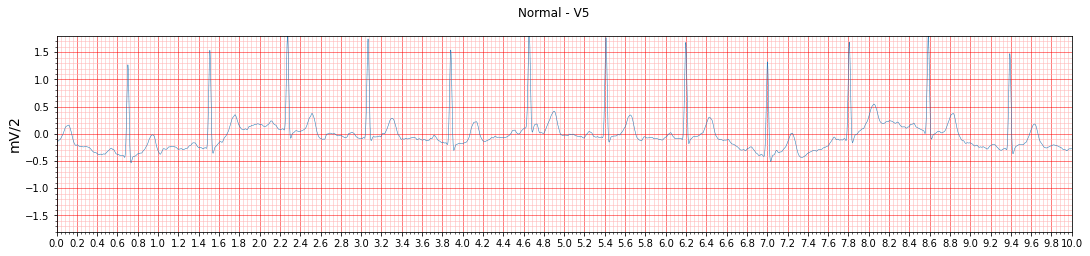

In [ ]:
ecg_plot.plot_1(X_val[7].reshape(12,5000)[10] *(2/1000), sample_rate=500, title = 'Normal - V5', fig_width=15, fig_height=4)
plt.ylabel("mV/2", fontsize=14)

#ecg_plot.save_as_png("Normal - V5")
ecg_plot.show()

In [ ]:

values_per_slice_ecg = math.ceil(len(series_ecg) / num_slices_ecg)
plt.plot(series_ecg, 'b', label='Explained instance (class 4)')
plt.plot(ecg_test_x.iloc[ecg_test_y[ecg_test_y == 1].index, :].mean(), color='green',
        label='Mean of class 1')
plt.plot(ecg_test_x.iloc[ecg_test_y[ecg_test_y == 2].index, :].mean(), color='red',
        label='Mean of class 2')
plt.plot(ecg_test_x.iloc[ecg_test_y[ecg_test_y == 3].index, :].mean(), color='black',
        label='Mean of class 3')
for i in range(num_features_ecg):
    feature, weight = exp2.as_list()[i]
    start = feature * values_per_slice_ecg
    end = start + values_per_slice_ecg
    color = 'red' if weight < 0 else 'green' 
    plt.axvspan(start , end, color=color, alpha=abs(weight*10))
plt.legend(loc='lower left')
plt.show()

In [ ]:
plt.axvline(x=1585/500,color = "g")
plt.axvline(x=4588/500,color = "g")
plt.axvline(x=1583/500,color = "g")
plt.axvline(x=3635/500,color = "g")

In [ ]:
load_challenge_data(ecg_val_files[5])

(array([[ 140.,  167.,  192., ...,   -8.,  -10.,   -9.],
        [-306., -249., -199., ..., -170., -174., -178.],
        [-446., -416., -391., ..., -162., -164., -169.],
        ...,
        [ 693.,  845.,  998., ...,  -61.,  -58.,  -56.],
        [ 695.,  880., 1069., ..., -107., -104., -103.],
        [ 526.,  705.,  893., ..., -111., -109., -107.]]),
 ['A0040 12 500 15500 12-May-2020 12:33:59\n',
  'A0040.mat 16+24 1000/mV 16 0 140 -1864 0 I\n',
  'A0040.mat 16+24 1000/mV 16 0 -306 -1246 0 II\n',
  'A0040.mat 16+24 1000/mV 16 0 -446 618 0 III\n',
  'A0040.mat 16+24 1000/mV 16 0 82 -6024 0 aVR\n',
  'A0040.mat 16+24 1000/mV 16 0 293 -956 0 aVL\n',
  'A0040.mat 16+24 1000/mV 16 0 -375 7158 0 aVF\n',
  'A0040.mat 16+24 1000/mV 16 0 330 -536 0 V1\n',
  'A0040.mat 16+24 1000/mV 16 0 711 -2234 0 V2\n',
  'A0040.mat 16+24 1000/mV 16 0 637 -1578 0 V3\n',
  'A0040.mat 16+24 1000/mV 16 0 693 -5589 0 V4\n',
  'A0040.mat 16+24 1000/mV 16 0 695 -4776 0 V5\n',
  'A0040.mat 16+24 1000/mV 16 0 526

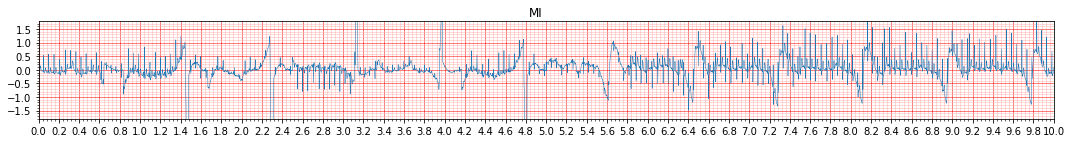

In [ ]:
ecg_plot.plot_1(X_val[5].T[1] *(1/1000), sample_rate=500, title = 'MI')

In [ ]:
data = load_challenge_data(ecg_val_files[5])[0]

In [ ]:
data[1]

array([-306., -249., -199., ..., -170., -174., -178.])

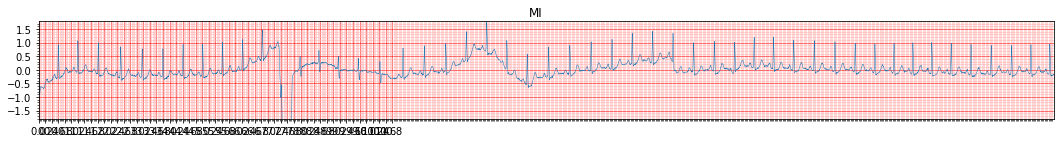

In [ ]:
ecg_plot.plot_1(data[1]*(1/1000), sample_rate=500, title = 'MI')

In [ ]:
data_pad = pad_sequences(data, maxlen=5000, truncating='post',padding="post")

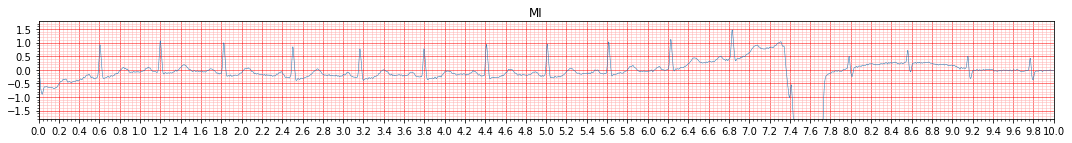

In [ ]:
ecg_plot.plot_1(data_pad[1]*(1/1000), sample_rate=500, title = 'MI')

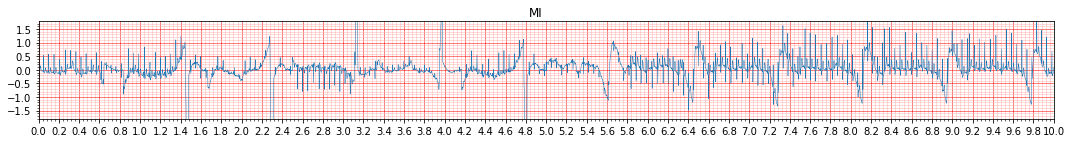

In [ ]:

ecg_plot.plot_1(X_val[5].T[1]*(1/1000), sample_rate=500, title = 'MI')

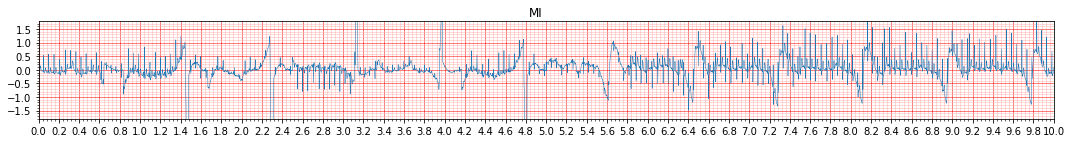

In [ ]:
ecg_plot.plot_1(X_val[5].T[1]*(1/1000), sample_rate=500, title = 'MI')

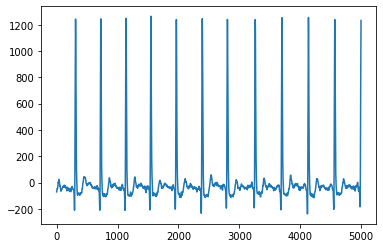

In [ ]:
plt.plot(X_val[100][1])

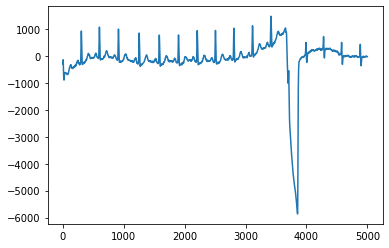

In [ ]:
plt.plot(data_pad[1])

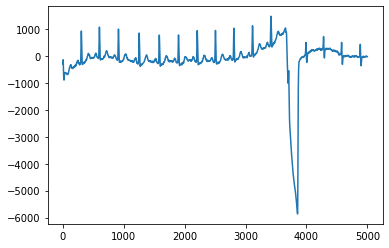

In [ ]:
plt.plot(X_val[5][1][:])

In [ ]:
X_val = []
for j in ecg_val_files:
  data = load_challenge_data(j)[0]
  ecg = pad_sequences(data, maxlen=5000, truncating='post',padding="post")
  ecg_shaped = ecg.reshape(5000,12)
  X_val.append(ecg)
X_val = np.asarray(X_val)

In [ ]:
X_val.shape

(4311, 12, 5000)